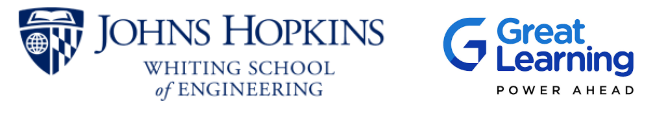



<font size=10>**Foundation of AI**</font>

<font size=6>**Automated Address Classification**</font>

# **Automated Address Classification: Tackling Inefficiencies with AI**

## **Overview**

A rapidly-growing company, handling a large volume of address-based service requests, faced significant inefficiencies in manually classifying addresses into specific categories. The manual process of reviewing and categorizing addresses into predefined groups, such as *Business*, *Shared*, *Multiple*, *Duplicate*, or *Others*, resulted in delays, errors, and resource exhaustion. Recognizing the need for innovation and scalability, the company embarked on an AI-driven transformation to address these challenges.

To kickstart the initiative, the company’s management identified a total dataset of **25,000 manually reviewed addresses**. While this manual review provided valuable data, it was time-consuming, prone to human errors, and not sustainable for large-scale operations. Of these, the company's director provided the data science team with a subset of **10,000 labeled addresses** for training purposes, while the remaining **15,000 addresses were left unlabeled**. The company then sought to leverage machine learning (ML) to classify this additional 15,000 new addresses more efficiently, aiming to improve accuracy and reduce manual labor.

By using **regular expressions** and **machine learning**, the company set a goal to achieve over ***80% classification accuracy*** in this 15,000-unlabelled address dataset. Achieving this accuracy on the 10k labeled dataset would validate the approach and demonstrate the potential to scale this solution to *handle up to 1 million addresses*, reducing manual effort and errors significantly.

With machine learning now applied to the remaining 15,000 addresses, the company’s team anticipates a future where AI-driven classification can be applied to their growing dataset, improving both efficiency and accuracy. The success of this approach could pave the way for automating classification on a larger scale, enabling the company to manage the massive volume of address-based requests more effectively.

This **AI-powered transformation** not only addressed immediate operational challenges but also positioned the company as a tech-savvy leader in leveraging AI to streamline processes and improve customer service.

## **Key Outcomes**

- The objective of this week is to **<font color='blue'>understand how businesses leverage AI</font>** with tools & technologies to classify and process address data efficiently using both **<font color='blue'>rule-based (Regex)*</font>** and **<font color='blue'>machine learning (ML) </font>** approaches.

- The outcome of this week is **NOT** to understand the tiny details like codes and syntax, but to **<font color='blue'>focus on the end-to-end AI workflow</font>**, the methods, and the final output/results

- Do not worry about the details of how something was created - **<font color='blue'>you will learn the concepts demonstrated over the duration of this program</font>**

- Learn how to evaluate AI solutions using **<font color='blue'>performance metrics </font>**(e.g., accuracy, precision, recall, F1-score) and **<font color='blue'>visualizations</font>** like category distribution charts.

- Think of this week as a preview of what you will be capable of doing in the next week where you will actually write code to solve business problem

- By the end of this case study, you will have an understanding of how businesses automate address classification and the impact of AI-driven solutions.

**regex is a rule based method to identify pattern within text*

**Objectives**

1. **Automate Address Classification:** Assign addresses to predefined categories where each address must fall into either of 5 categories listed below:

   *   **Business**

      Description: Addresses associated with office buildings or commercial establishments.

      Example: Address: 123 Main St, Suite 200.
      
      How to recognise: The address is registered as an office building rather than a residential property.
   *   **Shared**

      Description: Multiple households might share the same address (e.g., apartment complexes or housing units), and the system sometimes treated them as a single unit.

      Example: Address: 456 Elm St, Apt 3A and 456 Elm St, Apt 3B.
      these as duplicate requests for the same base address (456 Elm St).
   *   **Multiple**

      Description: Some properties had multiple valid addresses due to aliasing or historical records, leading to confusion or duplicate flags.

      Example: Address: 789 Maple Ave and 789 Maple Drive.

      How to recognise: Both addresses refer to the same property, but the system treated them as two distinct households or flagged one as a duplicate.
   *   **Duplicate**

      Description: The same address was submitted multiple times by different residents or by the same household.

      Example: Address: 1010 Pin

      How to recognise: John Doe and Jane Doe both submitted requests for the same address, results in duplicate submissions.
   *   **Others**
      
      Description: Miscellaneous issues that didn't fit into the other categories, such as incomplete, improperly formatted, or unverifiable addresses.
      
      Example: Address: PO Box 123 or "Corner of Oak" and 2nd Ave."

2. **Error Reduction:** Minimize incorrect classifications and reduce manual intervention.

3. **Improved Accuracy:** Compare regex-based and machine learning model (decision tree) classifications.

4. **Operational Efficiency:** Enable large-scale automation to improve response times.


## <font color='blue'>**Solution Workflow**</font>

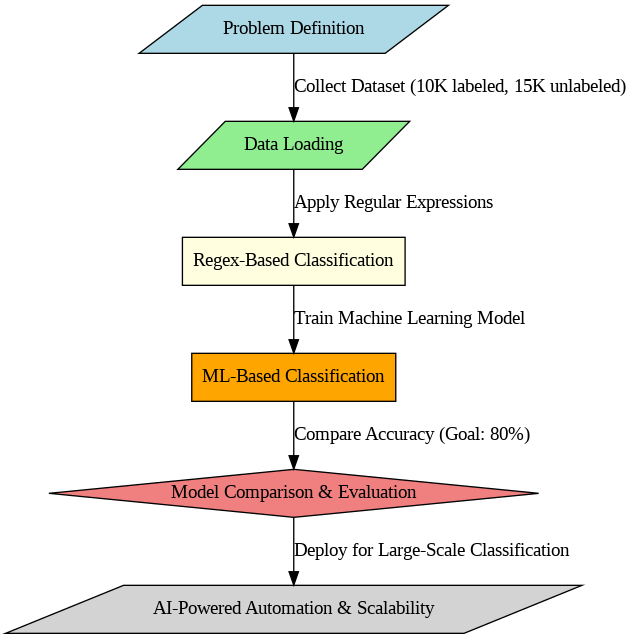

## <font color='blue'>**Methodology Overview**</font>

1️⃣ Regex-Based Classification

Improve regex patterns for more accurate address detection.
Apply regex to classify each address into Business, Shared, Multiple, Duplicate, or Others.

2️⃣ Machine Learning Models

Implement Decision Tree.
Train and evaluate the model on the dataset.
Print classification reports for comparison.

#### **How to Proceed**

1. Setup and Dataset Loading
2. Method 1: Regex-Based Classification
3. Method 2: ML Based Classification (Decision Tree)
4. Model Comparison

# **<font color='blue'>Setup and Dataset Loading</font>**


### <font color='dark green'>Setup </font>


We'll be using following Libraries
1. `pandas`: Handles the dataset, allowing easy loading, viewing, and manipulation of tabular data.
2. `re`: Applies rule-based classification using pattern matching in text.
3. `train_test_split`: Divides the dataset into training and testing subsets for unbiased evaluation.
4. `CountVectorizer`: Converts textual data into a numerical data.
5. `DecisionTreeClassifier`: Performs classification on the dataset.
6. `classification_report`: Measure model performance using metrics like precision, recall, f1 and accuracy.

In [3]:
# @title Importing Libraries
# Importing Libraries

import re
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

Load the provided training and testing datasets into your Colab environment to begin processing address data.

This code defines a function `load_data()` to read training and testing datasets from CSV files. It then loads the datasets "`10k_Address_manual_reviewed.csv`" and "`15k_Address_unlabeled.csv`" into train_df and test_df, respectively, for further processing.

In [2]:
# @title Function to load the train and test dataset
"""
Load the provided training and testing datasets into your Colab environment to begin processing address data.
"""
import pandas as pd
import os

data_path = r"C:/Users/lidcunu/Workspaces/AI_ML"

print(f"{os.getcwd()}")
# Construct file paths
train_file = os.path.join(data_path, "10k_Address_manual_reviewed.csv")
test_file = os.path.join(data_path, "15k_Address_unlabeled.csv")

# Upload the datasets provided into Colab.

def load_data(train_path, test_path):
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    return train_df, test_df

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

# Load data
train_df, test_df = load_data("./10k_Address_manual_reviewed.csv", "./15k_Address_unlabeled.csv")

print(f"Shape of the train and test data: {train_df.shape, test_df.shape}")

print(f"Shape of the train and test data: {train_file}"
      )

/content


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/lidcunu/Workspaces/AI_ML/10k_Address_manual_reviewed.csv'

The dataset is loaded from the provided CSV files into a dataframe.

## **Dataset**


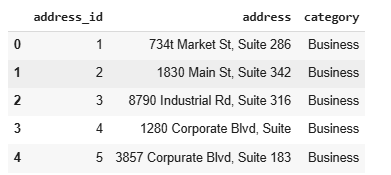

This is done in order to work on a labeled dataset where 'Category' of the address is the target variable.

# **<font color='blue'>Method 1: Regex-Based Classification</font>**


This section introduces regex-based classification as an initial approach, ensuring efficient and rule-based address categorization. The accuracy metric serves as a baseline for further model development. If regex achieves acceptable accuracy, it may suffice for some use cases.  

**Regex Rules:** The function matches address patterns to assign initial categories. Regex patterns use specific keywords and structures commonly found in each category.

**Categories Explained:**


*   **Business:** Looks for keywords like `Suite`, `Office`, `Building`, or `Center` that commonly indicate a business address. The optional `\s?\d*` accounts for optional numbers after the keyword.
*   **Shared:** Matches terms like `Apt`, `Unit`, `Fl`, or `Floor`, which indicate shared living spaces.
*   **Multiple:** Identifies addresses with phrases like `123 Main St` and `123 Maple Dr`, where variations represent the same property.
*   **Duplicate:** Captures identical street addresses with valid suffixes (`St`, `Ave`, `Blvd`, etc.) submitted repeatedly.
*   **Others:** Matches incomplete or ambiguous addresses, such as `PO Box`, `Corner of`, or undetermined locations.

**Purpose:** Preprocessing ensures baseline categorization for comparison with machine learning.

<font color='blue'>**regex_patterns** </font>

    "Business": r"\b(?:Suite|Office|Building|Center)\s?\d*\b",                                                                                              # Matches business-related terms with optional numbers.
    "Shared": r"\b(?:Apt|Unit|Fl|Floor)\s?\d*\b",                                                                                                           # Matches shared living spaces like apartments or units.
    "Multiple": r"\b\d+\s\w+\s(?:St|Ave|Blvd|Way|Dr|Rd|Ln|Pkwy|Terr|Plz|Pl)(?:\sand\s\d+\s\w+\s(?:St|Ave|Blvd|Way|Dr|Rd|Ln|Pkwy|Terr|Plz|Pl))\b",           # Matches multiple valid address aliases.
    "Duplicate": r"\b\d+\s\w+\s(?:St|Ave|Blvd|Way|Dr|Rd|Ln|Pkwy|Terr|Plz|Pl)$",                                                                             # Matches repeated identical addresses.
    "Others": r"\b(?:PO\sBox\s\d+|Corner\sof\s\w+\s(?:St|Ave)|Street\sUnknown|Undetermined)\b"                                                              # Matches incomplete or unverifiable addresses.


<font color='green'>**Note:** *Don't worry if regex seems complex. It was traditionally used for pattern matching, but modern GenAI models have significantly improved this process. If you're interested in learning more about regex, we will share additional content. For now, understanding its basics will help in this*</font>


The Below used function applies regex patterns to classify each address into a predefined category.

**Key Logic:**
*   **String Check:** Ensures the input address is a string. If not, it's automatically classified as "Others". This handles cases where the data might contain NaN or other non-string entries.
*   **Regex Matching:** Iterates over the regex_patterns dictionary and applies each pattern to the given address using re.search().
*   **Return Category:** Returns the category of the first matching pattern. If no patterns match, the address is classified as "Others".

### <font color='dark green'>Applying Regex </font>

In [8]:
# @title Classify address text into predefined categories using regex patterns
"""
Classify address text into predefined categories using regex patterns that identify keywords, structures, or formats. Categories include 'Business,' 'Shared,' 'Multiple,' 'Duplicate,' and 'Others,' with specific matching criteria for each.
"""
# Define regex patterns for classification
# Each pattern matches specific keywords or structures that characterize the category.

regex_patterns = {
    "Business": r"\b(?:Suite|Office|Building|Center)\s?\d*\b",                                                                                              # Matches business-related terms with optional numbers.
    "Shared": r"\b(?:Apt|Unit|Fl|Floor)\s?\d*\b",                                                                                                           # Matches shared living spaces like apartments or units.
    "Multiple": r"\b\d+\s\w+\s(?:St|Ave|Blvd|Way|Dr|Rd|Ln|Pkwy|Terr|Plz|Pl)(?:\sand\s\d+\s\w+\s(?:St|Ave|Blvd|Way|Dr|Rd|Ln|Pkwy|Terr|Plz|Pl))\b",           # Matches multiple valid address aliases.
    "Duplicate": r"\b\d+\s\w+\s(?:St|Ave|Blvd|Way|Dr|Rd|Ln|Pkwy|Terr|Plz|Pl)$",                                                                             # Matches repeated identical addresses.
    "Others": r"\b(?:PO\sBox\s\d+|Corner\sof\s\w+\s(?:St|Ave)|Street\sUnknown|Undetermined)\b"                                                              # Matches incomplete or unverifiable addresses.
}

In [16]:
print(train_df.columns)
print(test_df.columns)

Index(['address_id', 'address', 'category', 'regex_category'], dtype='object')
Index(['address_id', 'address'], dtype='object')


In [17]:
# @title Function to apply regex classification and evaluate the performance
# Function to apply regex classification with error handling
import re

def classify_address_regex(address, regex_patterns):
    if not isinstance(address, str):                            # Ensure it's a string. Handle non-string data gracefully
        return "Others"
    for category, pattern in regex_patterns.items():
        if re.compile(pattern, re.IGNORECASE).search(address):          # Case-insensitive match
            return category
    return "Others"

def apply_regex_classification(train_df, regex_patterns):
    train_df["regex_category"] = train_df["address"].astype(str).apply(lambda x: classify_address_regex(x, regex_patterns))
    return accuracy_score(train_df["category"], train_df["regex_category"])

# Apply regex classification
regex_acc = apply_regex_classification(train_df, regex_patterns)

# Calculate and print the accuracy of regex-only classification as a baseline
# Compares the regex_category (predicted) with the actual category (ground truth) using accuracy_score().

regex_accuracy = accuracy_score(train_df["category"], train_df["regex_category"])
print(f"Regex-only Classification Accuracy: {regex_accuracy:.4f}")

NameError: name 'accuracy_score' is not defined

In [12]:
# @title Run the code to display the mis-classifications due to Regex
# Display first 10 rows
from sklearn.metrics import accuracy_score, confusion_matrix

# Select misclassified rows & ensure variety from all categories
misclassified_df = train_df[train_df["category"] != train_df["regex_category"]]
balanced_sample = misclassified_df.groupby("category").apply(lambda x: x.sample(n=min(4, len(x)), random_state=42)).reset_index(drop=True)

# Ensure we get at least 20 diverse rows
final_sample = pd.concat([balanced_sample, train_df.sample(n=20 - len(balanced_sample), random_state=42)]).head(20)

# Display 20 rows covering misclassifications
print("\nSample Address Classification (20 Rows Including Misclassifications):")
print(final_sample[["address", "category", "regex_category"]])

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(train_df["category"], train_df["regex_category"], labels=list(regex_patterns.keys()))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=regex_patterns.keys(), yticklabels=regex_patterns.keys())
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.title("Regex Classification - Confusion Matrix")
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [11]:
# @title Compare the actual category of the addresses with Regex-generated categories for the training dataset
# --------- NEW VISUALIZATION ---------
# Compare actual vs regex-based predictions
plt.figure(figsize=(10,5))
actual_counts = train_df["category"].value_counts().sort_index()
regex_counts = train_df["regex_category"].value_counts().sort_index()

# Combine data for comparison
comparison_df = pd.DataFrame({"Actual": actual_counts, "Predicted (Regex)": regex_counts})
comparison_df.plot(kind="bar", figsize=(10,5), colormap="viridis", edgecolor="black")
plt.title("Comparison of Actual vs Regex-Based Classification")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(["Actual", "Predicted (Regex)"])
plt.show()

NameError: name 'plt' is not defined

## **Regex Observation**

<font color='red'>Regex-only Classification Accuracy: **0.7432** </font>

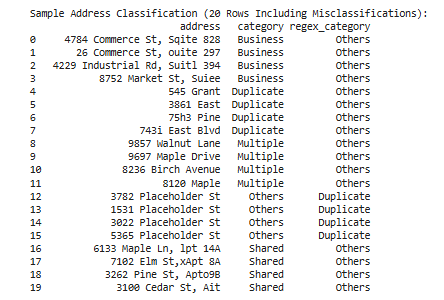

The table shows **20 addresses** along with their actual categories (ground truth) and their predicted categories using regex-based classification.

Each row contains:

* **Address** – The input address.

* **Category** – The actual category assigned based on the labeled training dataset.

* **Regex_Categor**y – The category assigned using regex rules.



**Bar Chart (Actual vs Regex Predictions):**

- Helps spot discrepancies between ground truth and regex classifications.
- If regex is overpredicting "Business" but underpredicting "Others", this will be clearly visible.

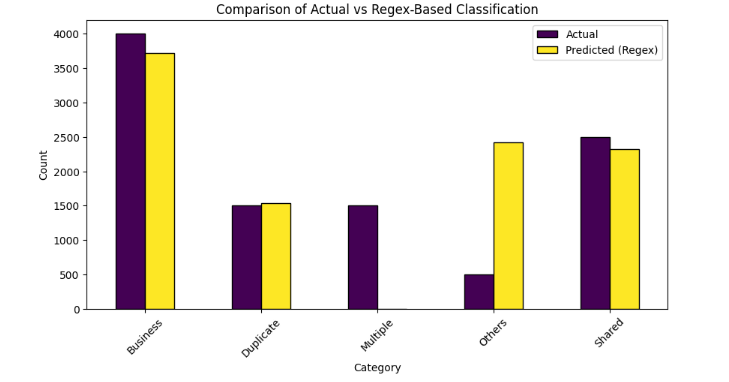

<font color='blue'>**Key Observations** </font>
1. **Misclassifications (Regex vs Actual)**

- The regex function has misclassified several addresses.
- For example:
  - "4784 Commerce St, Sqite 828" was actually "Business" but classified as "Others" by regex.
  - "9857 Walnut Lane" was "Multiple" but regex classified it as "Others".
  - "3782 Placeholder St" was "Others", but regex wrongly labeled it as "Duplicate".

2. **Regex Struggling with Variations**

- "Sqite" (a typo for "Suite") was missed by the regex meant to classify "Business".
- "9857 Walnut Lane" and "9637 Maple Drive" should be "Multiple" but weren't matched correctly.
- "3100 Cedar St, Ait" should be "Shared" but regex marked it as "Others" (probably due to an unrecognized abbreviation).

3. **Regex Might Be Overly Rigid**

- Regex worked well for some cases, such as "7431 East Blvd" and "738 Placeholder St", correctly classifying them as "Duplicate".
- However, it seems too strict, leading to false negatives, where addresses that should match a pattern were not recognized.

# **<font color='blue'>Method 2: ML Based Classification (Decision Tree)</font>**


## **Model Training**

### <font color='blue'>Steps </font>

1. **train_ml_model(train_df)**

- Convert text addresses into numerical feature vectors.
- Extracts features (X) from the "address" column and target labels (y) from the "category" column.
- Splits the data into training (80%) and validation (20%) sets using `train_test_split()`.
  - **Train-Test Split:** Divides data into 80% training and 20% testing for model evaluation. We train the model initially only on the Training dataset.
- Trains a DecisionTreeClassifier on the training set.
- Prints a message indicating that model training is complete.
- Predicts categories on the validation set (y_pred).
- Returns the trained model, vectorizer, accuracy score, and predictions.


2. **Training the Model**

- Calls *train_ml_model(train_df)* to train the model and obtain evaluation metrics.


3. **Evaluating the Model**

- Computes the accuracy of the trained model using *accuracy_score*(y_val, y_pred).
- Prints the accuracy score and generates a detailed classification_report() showing precision, recall, and F1-score for each category.

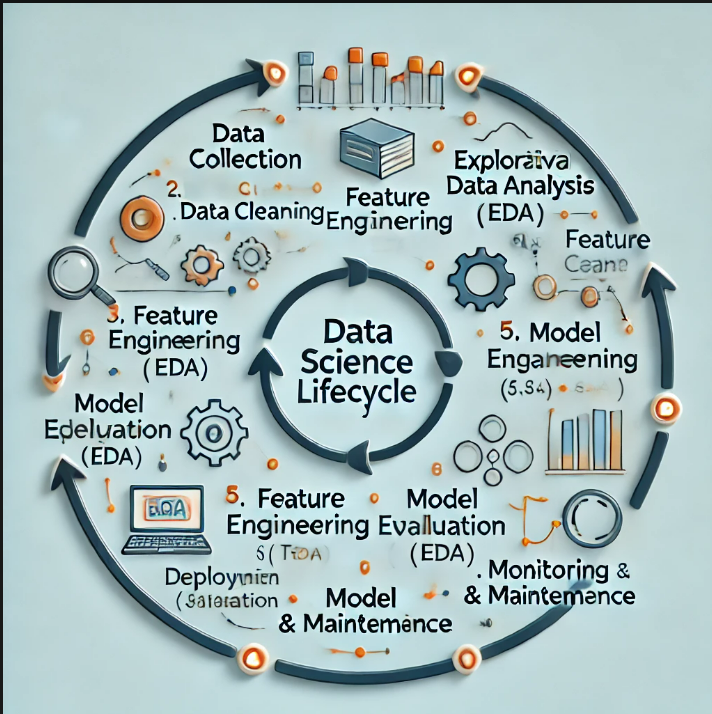

### <font color='dark green'>Training Model </font>

In [9]:
# @title Function to train ML model
"""
Transform the 'address' column into numerical features for a machine learning model. Use these features to predict the 'category' column.
"""

# Feature extraction using character-level representation
# CountVectorizer converts text into a sparse matrix of token counts for machine learning models.

# Train Random Forest model
# Random Forest is an ensemble method that builds multiple decision trees and aggregates their results to improve accuracy.
# It is robust to noise, works well for classification tasks, and prevents overfitting.

def train_ml_model(train_df):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(train_df["address"].astype(str))
    y = train_df["category"]
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    print("Model training complete.")
    y_pred = model.predict(X_val)
    return model, vectorizer, accuracy_score(y_val, y_pred), y_val, y_pred


# Train ML model
model, vectorizer, ml_acc, y_val, y_pred = train_ml_model(train_df)

Model training complete.


In [10]:
# @title Calculate the performance of the ML model (Decision Tree)
# Evaluate model
ml_accuracy = accuracy_score(y_val, y_pred)                           # Calculate accuracy

print(f"Decision Tree Model Accuracy: {ml_accuracy:.4f}")

print("Classification Report:\n", classification_report(y_val, y_pred))

Decision Tree Model Accuracy: 0.9760
Classification Report:
               precision    recall  f1-score   support

    Business       1.00      1.00      1.00       803
   Duplicate       0.89      0.96      0.93       301
    Multiple       0.96      0.93      0.94       303
      Others       1.00      0.94      0.97        86
      Shared       1.00      0.98      0.99       507

    accuracy                           0.98      2000
   macro avg       0.97      0.96      0.97      2000
weighted avg       0.98      0.98      0.98      2000



### **Model Training Observation**

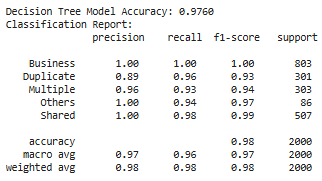

<font color='red'>Decision Tree Model Accuracy: **0.9760**  </font>

The above section evaluates the model's performance on the validation set.

**classification_report:** Provides detailed metrics, including precision, recall, and F1-score.

**Accuracy:** Measures the percentage of correct predictions (correctly classified addresses).

**Key Metrics:**
*   **Precision:** The percentage of correctly classified addresses out of all classified as that category.
*   **Recall:** The percentage of correctly classified addresses out of the actual addresses in that category.
*   **F1-score:** The harmonic mean of precision and recall (best is 1, worst is 0).
*   **Support:** Number of test samples in each category.
*   **Accuracy:** The overall percentage of correctly classified addresses.

## **Model Prediction and Evaluation**

**Prepare Test Data**

*   Preprocess test data to ensure it has no missing values (NaN) and is treated as strings.
*   Missing or non-string values could cause errors during feature extraction.









*   Use the trained model to predict categories for the test data.
    *   Similar to the function being used during training, it is reused to ensure the test data is represented in the same feature space.
    *   Predicted Categories areStored in a new column `predicted_category`.


### <font color='blue'>Steps </font>
1. **Function: predict_and_evaluate()**

- Predicts categories for `test_df` using the trained model and vectorizer by transforming the "address" column into numerical features.
- Calculates accuracy by comparing predicted categories with actual categories from the labeled dataset (labeled_df).
- Computes precision, recall, and F1-score using weighted averages to account for class imbalances.
- Returns the updated test_df (with predictions), along with accuracy, precision, recall, and F1-score.

2. **Loading the Labeled Test Dataset**

- Reads "`15k_Address_labeled_for_classification.csv`" into `test_df_labeled`, which contains actual categories for evaluation.

3. **Predicting and Evaluating the Model**

- Calls `predict_and_evaluate()` with the trained model and labeled test data.
Stores the final accuracy, precision, recall, and F1-score for evaluation.

### <font color='dark green'>Prediction and Evaluation </font>

In [11]:
# @title Function for predict and evaluate
def predict_and_evaluate(model, vectorizer, test_df, labeled_df):
    test_df["predicted_category"] = model.predict(vectorizer.transform(test_df["address"].astype(str)))
    accuracy = accuracy_score(labeled_df["category"], test_df["predicted_category"])
    precision = precision_score(labeled_df["category"], test_df["predicted_category"], average="weighted")
    recall = recall_score(labeled_df["category"], test_df["predicted_category"], average="weighted")
    f1 = f1_score(labeled_df["category"], test_df["predicted_category"], average="weighted")
    return test_df, accuracy, precision, recall, f1

In [12]:
# @title Load labeled dataset for evaluation
test_df_labeled = pd.read_csv("15k_Address_labeled_for_classification.csv")
test_df, final_acc, precision, recall, f1 = predict_and_evaluate(model, vectorizer, test_df, test_df_labeled)

In [13]:
# @title Save the test predictions to a CSV file for further analysis or reporting.

test_df.to_csv("15k_Address_test_results.csv", index=False)
print("Test predictions saved to 15k_Address_test_results.csv")

Test predictions saved to 15k_Address_test_results.csv


In [14]:
# @title Compare Accuracies
"""
Compare the accuracy of a regex-based model with that of a random forest model, highlighting the improvement in performance. Display the individual accuracies and their difference.
"""

# Final Accuracy Comparison
# Compare the regex-based baseline accuracy with the Random Forest regression model accuracy

print("\n### Accuracy Comparison ###")
print(f"Regex-only Accuracy: {regex_accuracy:.4f}")
print(f"Decision Tree Model Accuracy: {ml_accuracy:.4f}")
print(f"Accuracy Improvement: {ml_accuracy - regex_accuracy:.4f}")


### Accuracy Comparison ###
Regex-only Accuracy: 0.7432
Decision Tree Model Accuracy: 0.9760
Accuracy Improvement: 0.2328


### **Model Prediction Observation**

Test predictions saved to 15k_Address_test_results.csv

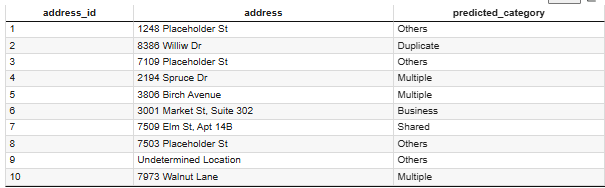

Compare the accuracy of regex-only and decision tree based classification, highlighting the improvement in performance. Display the individual accuracies and their difference.

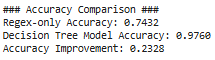

This shows how much the machine learning model improves accuracy over the baseline regex approach.

In [15]:
# @title Display First 10 Rows of the predicted dataset
# Display the first few rows of predictions and the distribution of predicted categories in the test data.

test_df.head(10)


,address_id,address,predicted_category
0,1,1248 Placeholder St,Others
1,2,8386 Williw Dr,Duplicate
2,3,7109 Placeholder St,Others
3,4,2194 Spruce Dr,Multiple
4,5,3806 Birch Avenue,Multiple
5,6,"3001 Market St, Suite 302",Business
6,7,"7509 Elm St, Apt 14B",Shared
7,8,7503 Placeholder St,Others
8,9,Undetermined Location,Others
9,10,7973 Walnut Lane,Multiple


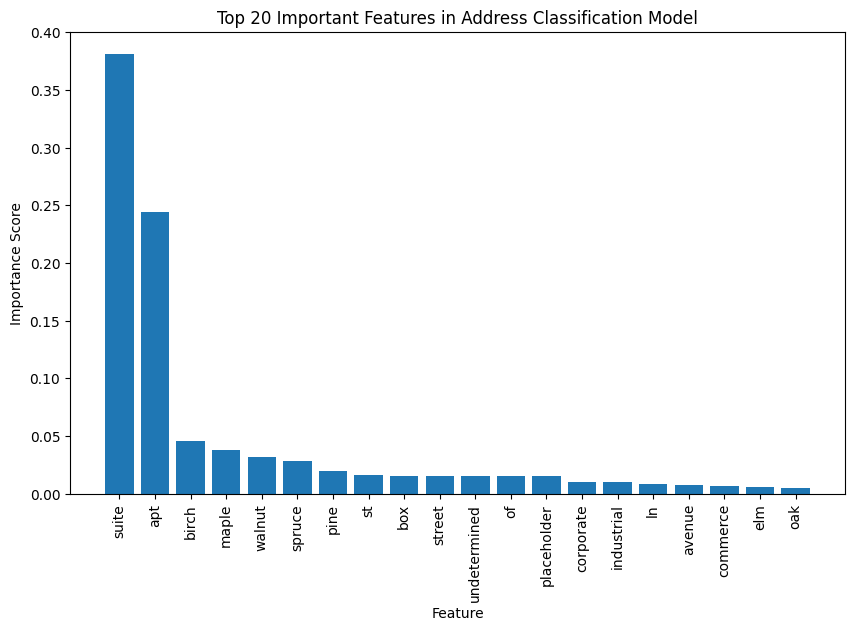

In [17]:
# @title Feature Importance Plot

# Feature Importance Plot for Decision Tree
importances = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Sort features by importance
indices = np.argsort(importances)[::-1]
top_n = 20  # Display top 20 important features

plt.figure(figsize=(10, 6))
plt.title("Top 20 Important Features in Address Classification Model")
plt.bar(range(top_n), importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), [feature_names[i] for i in indices[:top_n]], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

# **<font color='blue'>Model Comparison</font>**


The *plot_results(*) function visualizes and compares the performance of the regex-based model and the machine learning (ML) model.

<font color='blue'>**Concepts Involved:** </font>

1. **Bar Plot for Accuracy Comparison:**

- Uses Seaborn’s barplot to compare the accuracy of the regex-based model (regex_acc) and the ML model (ml_acc).
- Helps in understanding which approach performs better in classifying addresses.

2. **Confusion Matrix:**

- The confusion matrix is a table that compares actual vs. predicted categories.
- `sns.heatmap()`: Plots the confusion matrix with annotations, using the "Blues" color map for better visualization.
- *Purpose:* Identifies misclassification patterns and helps evaluate model performance.

### <font color='dark green'>Plot </font>


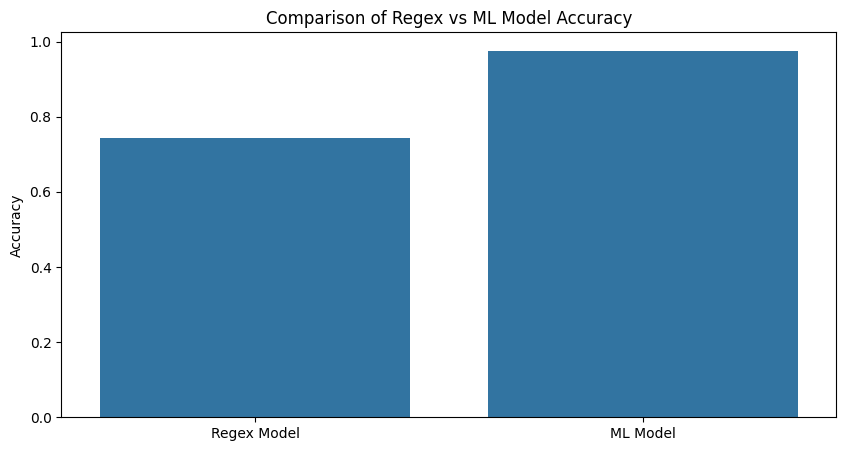

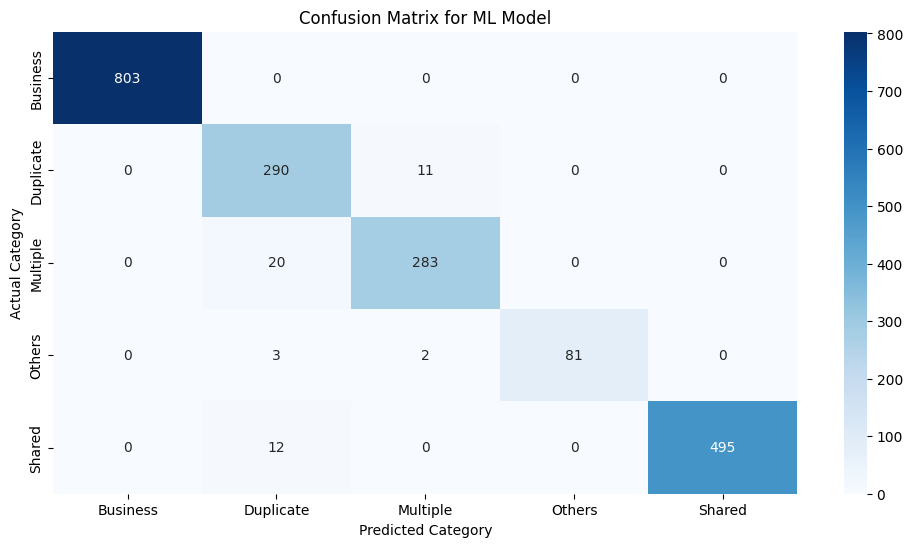

In [ ]:
# @title Comparison of Regex vs ML Model Accuracy
def plot_results(regex_acc, ml_acc, y_val, y_pred):
    plt.figure(figsize=(10,5))
    sns.barplot(x=["Regex Model", "ML Model"], y=[regex_acc, ml_acc])
    plt.ylabel("Accuracy")
    plt.title("Comparison of Regex vs ML Model Accuracy")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.heatmap(pd.crosstab(y_val, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Category")
    plt.ylabel("Actual Category")
    plt.title("Confusion Matrix for ML Model")
    plt.show()


# Plot results
plot_results(regex_acc, ml_acc, y_val, y_pred)


In [ ]:
# @title Final evaluation metrics for Decision Tree
# Print final evaluation metrics for Decision Tree
print(f"Final Accuracy: {final_acc:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

Final Accuracy: 0.96, Precision: 0.97, Recall: 0.96, F1-Score: 0.97


### **Comparing the models**

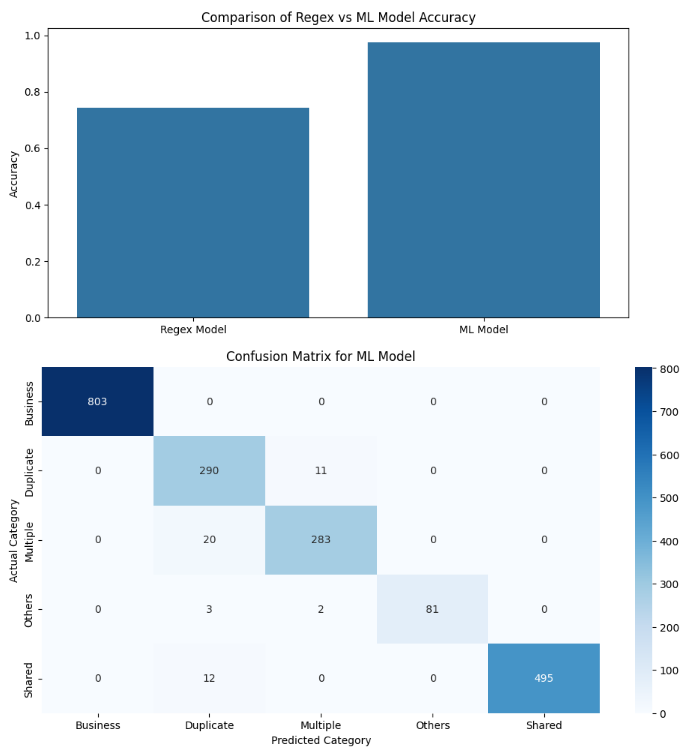

1. **Bar Plot: Comparison of Regex vs ML Model Accuracy**
* The <font color='blue'>x-axis </font> represents the two models: Regex Model and ML Model.
* The <font color='blue'>y-axis </font> shows the accuracy score.
* The ML model achieves a significantly higher accuracy compared to the regex-based approach.
* This suggests that the ML model is better at capturing complex address patterns.

2. **Confusion Matrix: ML Model Performance**
* The confusion matrix compares <font color='blue'>actual categories </font> (rows) with <font color='blue'>predicted categories </font> (columns).
* The values in each cell represent the number of samples classified into that category.
* <font color='blue'>Diagonal values (darkest blue): </font> Correct classifications (e.g., 803 "Business" addresses correctly classified as "Business").
* <font color='blue'>Off-diagonal values: </font> Misclassifications (e.g., 28 "Multiple" addresses classified as "Duplicate").
* The color intensity represents the count of samples (darker blue = higher count).

3. **Key Observations:**
- The ML model performs well, as most values are on the diagonal.
- Some misclassifications occur, but they seem minimal.
- "Business" and "Shared" categories have the highest correct predictions.

**This analysis confirms that the ML model is significantly more reliable than the regex approach.**

# **Conclusion**

-  The model demonstrates the <font color='blue'>**robustness and reliability** </font> of the AI-driven address classification solution.  
- Validates the solution's <font color='blue'>**effectiveness in automating address classification** </font> with minimal errors.  
- Highlights the model's <font color='blue'>**near-perfect alignment of precision and recall** </font>, ensuring:  
  - Correct classification of addresses.  
  - Minimal false positives and false negatives.  
- Underscores the potential to <font color='blue'>**scale seamlessly to larger datasets** </font>, enabling management of up to <font color='blue'>**1 million addresses** </font> efficiently.  
- Resolves <font color='blue'>**immediate inefficiencies** </font> while showcasing the company's:  
  - Commitment to <font color='blue'>**innovation** </font>.  
  - Focus on <font color='blue'>**operational excellence** </font> through AI-driven methodologies.  



## Further Enhancement

* Review the incorrect predicted categories and enhanace the regex classfication
* Hyper parameter tuning
*   Try different models (Gradient Boosting, KNN, logistic regression, SVM etc.)  
*   Deployment using Gradio/Streamlit




# **Deployment (for additional exploration)**


In [ ]:
# @title
!pip install gradio

# Gradio: Framework for creating user-friendly interfaces to interact with ML models.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
tor

This code integrates the trained machine learning model into a user-friendly Gradio interface. Users can input an address, and the app will display the predicted category based on the model's classification. The Gradio framework simplifies deployment, making the model accessible to non-technical users in an intuitive and visually appealing way.

In [ ]:
# @title
"""
Use Gradio to create an interactive UI for address classification, returning predicted categories based on user input.
"""

# Import Gradio library for creating an interactive user interface
import gradio as gr

# Function to classify an address
def classify_address(address):
    address_cleaned = str(address).strip()                              # Ensure input is a string and clean whitespace
    transformed_address = vectorizer.transform([address_cleaned])       # Convert to numerical features
    prediction = model.predict(transformed_address)                     # Use the trained model to predict category
    return prediction[0]                                                # Return category as a string

# Gradio Interface
# Creates a user interface (UI) using Gradio to interact with the address classification model.

interface = gr.Interface(
    fn=classify_address,                                                                                                        # Links the function that performs address classification.
    inputs=gr.Textbox(label="Enter Address", placeholder="E.g., Suite 200, 456 Pine St"),                                       # Provides a text input field for users to enter an address.
    outputs=gr.Textbox(label="Predicted Category"),                                                                             # Displays the predicted category (output) in a text box.
    title="Address Classifier",
    description="Enter an address, and the AI will classify it into Business, Shared, Multiple, Duplicate, or Others."
)

# Launch the Gradio app
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d0727e31fec97eab5a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
